# Lecture 6: Lab 02 in 6 lines of code (and improved!)

## Approach this semester

+ Implement something yourself to understand the technique
+ Check for tools that better implement the process

## Approach today

+ Given task and name of numpy function, read its documentation and complete the task with it.
+ How do you find numpy documentation? Google `numpy` and the name of the function you want documentation for
+ Type your code in a spyder file that you save

### Overall goal for the day: 

+ Many walks: `n_walks` of them
+ Each walk has many steps: `n_steps` of them
+ NO LOOPS!

## Starting code

Get the code below into spyder

In [2]:
import numpy as np

n_walkers = 10
n_steps = 100
step_size = 3

Run the code and save it

## First new numpy command: random.choice

+ Look up the documentation for `np.random.choice`
+ Use `np.random.choice` to generate a single step that is either `+step_size` or `-step_size`
+ Modify that to calculate `n_walkers` x `n_steps` random steps. 
+ Store the result in a variable named `x_steps`
+ You now have every step for every walker for the *x* direction.
+ Add a similar line to calculate all of the *y* direction steps.

In [7]:
x_steps = np.random.choice([+step_size, -step_size], 
                           size=[n_walkers, n_steps])
x_steps.shape

(10, 100)

## Set initial position to 0 for both x and y direction (slicing practice)

+ The variable `x_steps` has dimension `n_walkers` rows by `n_steps` columns
+ Which column number corresponds to the initial position?
+ What is the expression for slicing that column for all walkers? 
    + What fills in these blanks: `x_steps[     ,      ]`
+ Set the initial position to zero for `x_steps`
+ Do the same for `y_steps`

## Add up all of the steps: numpy cumulative sum function

+ Look at documentation for `np.cumsum`
+ Calculate the cumulative sum of the `x_step` along `axis=1`
+ Set to variable named `x_walk`
+ Repeat for y



In [12]:
x_steps[:, 0] = 0

x_walks = np.cumsum(x_steps, axis=1)

array([ 0,  3,  0, -3, -6, -3,  0, -3,  0,  3,  0,  3,  0, -3, -6, -3,  0,
        3,  6,  3,  0,  3,  0, -3,  0,  3,  6,  9, 12,  9, 12,  9, 12, 15,
       12, 15, 18, 21, 18, 21, 18, 15, 18, 21, 24, 27, 30, 33, 36, 39, 36,
       39, 36, 33, 30, 27, 30, 27, 24, 27, 24, 21, 24, 27, 30, 27, 24, 21,
       24, 21, 18, 15, 18, 15, 12,  9,  6,  9, 12,  9, 12, 15, 12, 15, 12,
        9,  6,  9, 12, 15, 12,  9, 12, 15, 18, 21, 18, 15, 12, 15])

# Completed code is below 
## It includes a plot like one of them from lab 2

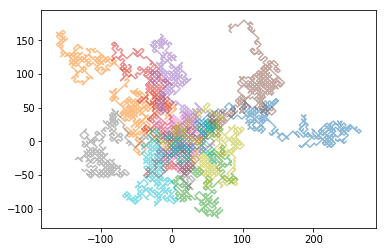

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_walkers = 10
n_steps = 1000
step_size = 3

# Generate individual steps in x and y
x_steps = np.random.choice([step_size, -step_size],
                          size=[n_walkers, n_steps])
y_steps = np.random.choice([step_size, -step_size],
                          size=[n_walkers, n_steps])

# Sum the steps to generate a complete walk
# axis=1 tells numpy to sum along the columns which are, in our case,
# the individual steps.
x_walks = np.cumsum(x_steps, axis=1)
y_walks = np.cumsum(y_steps, axis=1)

# Plot all of the walkers
for n in range(n_walkers):
    plt.plot(x_walks[n, :], y_walks[n, :], alpha=0.5)

Text(0,0.5,'Distance from origin')

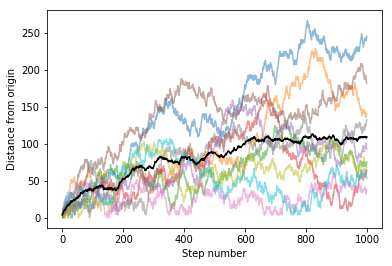

In [29]:
# We can also calculate distance 
distance = np.sqrt(x_walks**2 + y_walks**2)

# Plot distance for all walkers
for n in range(n_walkers):
    plt.plot(distance[n, :], alpha=0.5)

# Also calculate the average distance at each step, averaging over all
# of the walkers, i.e. all of the rows
avg_distance = distance.mean(axis=0)

plt.plot(avg_distance, color='black')

plt.xlabel('Step number')
plt.ylabel('Distance from origin')